In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Parsed from BrownianMotionParse

In [3]:
# sum(sqrt(data[:,3]**2+data[:,4]**2))

In [4]:
data = np.genfromtxt("data/data.txt",delimiter=',',dtype=None)
lhs = mean(data[:,7])
print "LHS: ", lhs
d = 2 #dimensions
D = 1.8256e-12 #experimental
tau = 0.1 #time interval[s]
rhs= 2*D*d*tau
print "RHS: ", rhs
print "D:",lhs/2./d/tau
print abs(rhs-lhs)/lhs*100

LHS:  7.96704734027e-12
RHS:  7.3024e-13
D: 1.99176183507e-11
90.8342455014


In [5]:
lhs/D/d/tau

21.820353144924884

In [6]:
abs(rhs-lhs)/lhs*100

90.8342455013604

In [7]:
shape(data)

(2845, 8)

In [8]:
data = np.genfromtxt("data/data.txt",delimiter=',',dtype=None)
sigma = std(data[:,6])
tau = 0.1
print sigma/2/tau

1.29729082257e-11


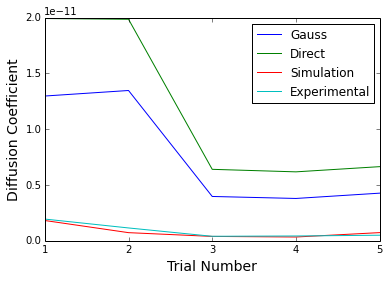

In [9]:
fig = plt.figure()
ax=fig.add_subplot(111)
Trial_number = [1,2,3,4,5]
gauss = [1.29729082257e-11,1.34680178631e-11,3.97313391704e-12,3.79405381957e-12,4.26851473797e-12]
direct = [1.9918e-11,1.9852e-11,6.4042e-12,6.1784e-12,6.6440e-12]
sim = [1.8184e-12,7.2988e-13,3.9260e-13,3.3975e-13, 7.3291e-13]
sim_err = [7.7701e-15, 3.2730e-15,1.6801e-15,1.4979e-15, 3.2063e-15]
exp = [1.9464e-12,1.1515e-12,4.0377e-13,4.3144e-13,5.0073e-13]
plt.plot(Trial_number,gauss,label="Gauss")
plt.plot(Trial_number,direct,label="Direct")
plt.plot(Trial_number,sim,label="Simulation")
plt.plot(Trial_number,exp,label="Experimental")
ax.xaxis.set_ticks(Trial_number)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlabel("Trial Number",fontsize=14)
plt.ylabel("Diffusion Coefficient",fontsize=14)

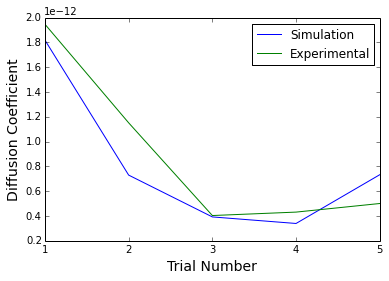

In [10]:
fig = plt.figure()
ax=fig.add_subplot(111)
sim = [1.8184e-12,7.2988e-13,3.9260e-13,3.3975e-13, 7.3291e-13]
sim_err = [7.7701e-15, 3.2730e-15,1.6801e-15,1.4979e-15, 3.2063e-15]
exp = [1.9464e-12,1.1515e-12,4.0377e-13,4.3144e-13,5.0073e-13]
plt.plot(Trial_number,sim,label="Simulation")
plt.plot(Trial_number,exp,label="Experimental")
ax.xaxis.set_ticks(Trial_number)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlabel("Trial Number",fontsize=14)
plt.ylabel("Diffusion Coefficient",fontsize=14)

In [11]:
for i,d_list in zip(np.arange(2,6),[7.2988e-13,3.9266e-13,3.3975e-13,7.3291e-13]):
    print "------------------------"
    data = np.genfromtxt("data/data{}.txt".format(i),delimiter=',',dtype=None)
    print "data num: {}".format(i)
    lhs = mean(data[:,7])
    print "LHS: ", lhs
    d = 2 #dimensions
#     D = 1.8256e-12 #experimental
    D=d_list
    tau = 0.1 #time interval[s]
    rhs= 2*D*d*tau
    print "RHS: ", rhs
    print "D:",lhs/2./d/tau
    print abs(rhs-lhs)/lhs*100
    sigma = std(data[:,6])
    tau = 0.1
    print "gauss: ",sigma/2/tau

------------------------
data num: 2
LHS:  7.94089938105e-12
RHS:  2.91952e-13
D: 1.98522484526e-11
96.3234391221
gauss:  1.34680178631e-11
------------------------
data num: 3
LHS:  2.56166594105e-12
RHS:  1.57064e-13
D: 6.40416485263e-12
93.8686775085
gauss:  3.97313391704e-12
------------------------
data num: 4
LHS:  2.47134886976e-12
RHS:  1.359e-13
D: 6.17837217441e-12
94.5009787302
gauss:  3.79405381957e-12
------------------------
data num: 5
LHS:  2.657611513e-12
RHS:  2.93164e-13
D: 6.64402878249e-12
88.9688918577
gauss:  4.26851473797e-12


In [12]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [13]:
shape(data[:,0])

(12576,)

In [14]:
corr = estimated_autocorrelation(data[:,0])

data num: 1


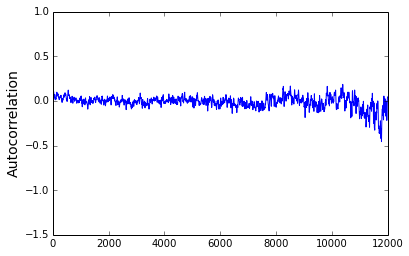

In [25]:
i=1
data = np.genfromtxt("data/{}.txt".format(i),delimiter=',',dtype=None)
print "data num: {}".format(i)
plt.plot(corr)
plt.xlim(0,12000)
plt.ylabel("Autocorrelation",fontsize=14)

In [16]:
mean(corr)

-0.016285855244644678

In [16]:
std(corr)

0.13196421373854297

In [30]:
onion_velocity_all= np.genfromtxt("data/onion_velocity_all.txt",delimiter=',',dtype=None)
onion_velocity_average_insta_all= np.genfromtxt("data/onion_velocity_average_instantaneous_all.txt",delimiter=',',dtype=None)
brown_v =np.genfromtxt('data/brownian_velocity_average_instantaneous_all.txt',delimiter=',',dtype=None)

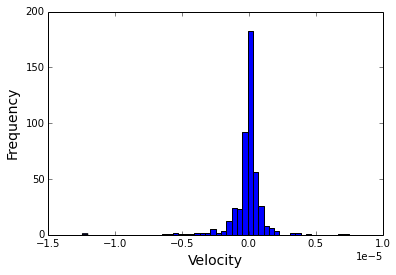

In [18]:
hist1 = plt.hist(onion_velocity_all,50)
plt.xlabel("Velocity",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [28]:
print mean(onion_velocity_all)

-1.28675126293e-07


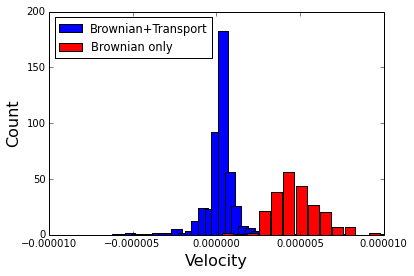

In [76]:
from matplotlib.legend_handler import HandlerLine2D
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
data = onion_velocity_all
width=0.6e-6
N, bin_edges = numpy.histogram(data,bins=50)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [100, 0, 0.5e-5]

coeff, var_matrix = curve_fit(gauss, bin_centres, N, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)
# plt.plot(bin_centres, hist_fit, '--',color="red",linewidth=3,label='Fitted data')
# # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
# print 'Fitted mean = ', coeff[1]
# print 'Fitted standard deviation = ', coeff[2]
plt.bar(bin_centres,N,width=width, color='blue',label="Brownian+Transport")#, yerr=error)
data = brown_v
data[data == inf] = 0
data = data[numpy.logical_not(numpy.isnan(data))]
width=0.65e-6
N, bin_edges = numpy.histogram(data,bins=50)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.bar(bin_centres,N,width=width, color='red',label="Brownian only")#, yerr=error)
plt.xlim(-0.00001,0.00001)

plt.xlabel("Velocity",fontsize=16)
plt.ylabel("Count",fontsize=16)
# plt.title("Velocity distribution of onion cell and microbead solution")
plt.legend(loc='upper left',prop={'size':11.5},numpoints=1)

In [82]:
p0 = [100, 0, 0.5e-5]
N, bin_edges = numpy.histogram(brown_v,bins=50)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
coeff, var_matrix = curve_fit(gauss, bin_centres, N, p0=p0)
hist_fit = gauss(bin_centres, *coeff)
ymod=   hist_fit
ydata = N
chisq=numpy.sum((ydata-ymod)**2)  
print chisq

nan


<Container object of 50 artists>

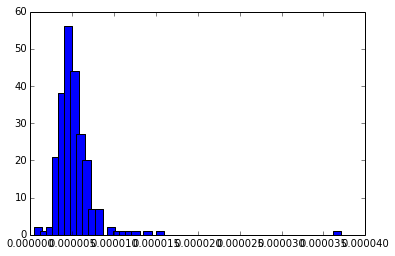

In [58]:
data = brown_v
data[data == inf] = 0
data = data[numpy.logical_not(numpy.isnan(data))]
width=1e-6
N, bin_edges = numpy.histogram(data,bins=50)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.bar(bin_centres,N,width=width, color='blue')#, yerr=error)

In [32]:
sqrt(0.15**2+1**2)

1.0111874208078342

In [31]:
print mean(onion_velocity_average_insta_all)

nan


In [31]:
6*pi*2.56940508658e-06*1.0*480e-9

2.3247429534996402e-11

In [34]:
0.48e-6*43

2.064e-05

In [35]:
6*pi*2.56940508658e-06*1.0*480e-9*0.48e-6*43

4.798269456023257e-16

Tried fitting a Gaussian but that is not a good fit because the goodness-of-fit chi squared is  1621.833 which is large. 

In [27]:
ymod=   hist_fit
ydata = N
chisq=numpy.sum((ydata-ymod)**2)  
print chisq

1621.83300317


In [24]:
from numpy import inf
onion_velocity_average_insta_all[onion_velocity_average_insta_all == inf] = 0
onion_velocity_average_insta_all = onion_velocity_average_insta_all[numpy.logical_not(numpy.isnan(onion_velocity_average_insta_all))]

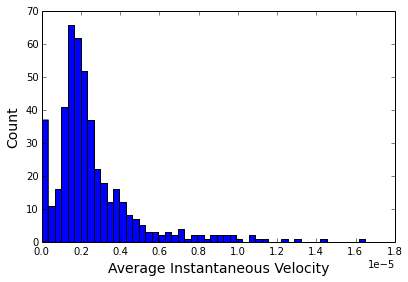

In [25]:
hist2 = plt.hist(onion_velocity_average_insta_all,50)
plt.xlabel("Average Instantaneous Velocity",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

computes the average of the magnitude of the instaneous velcoities of the particles 

# Linear Fit 

In [33]:
def fit_and_plot(x,y,xlabel="",ylabel="",title="",zeroed=False,annotate_fit= True,right_words = False,error_bar="",sci_lim = False,annotate="",right_annotate=False,marker='o'):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x,y,'{}'.format(marker))
    z = np.polyfit(x,y, 1) 
    p = np.poly1d(z)
    if zeroed : 
        a = np.linspace(0,max(x))
    else:
        a = np.linspace(min(x),max(x))
    ax1.plot(a, p(np.linspace(min(x),max(x))),color="red")
    if annotate_fit: 
        slope = z[0]
        intercept = z[1]
        if right_words:    
            ax1.text(0.48,0.85,"y= %.5f x + %.5f"%(slope,intercept), fontsize=13,transform=ax1.transAxes)
        else:
            ax1.text(0.03,0.85,"y= %.5f x + %.5f"%(slope,intercept), fontsize=13,transform=ax1.transAxes)
    if title !="":
        plt.title(title,fontsize=13 )    
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    if annotate!="":
        if right_annotate: 
            ax1.text(0.48,0.85,annotate, fontsize=13,transform=ax1.transAxes)
    if error_bar!="":
        ax1.errorbar(x, y, yerr=error_bar, fmt='o')
    if sci_lim:
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    return p

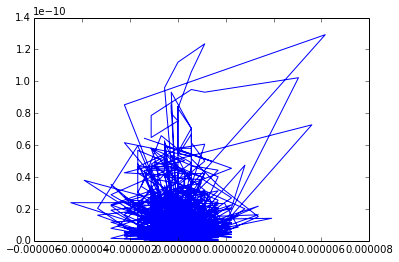

In [53]:
data = np.genfromtxt("data/data.txt",delimiter=',',dtype=None)
ith_pcl=30
dr2 = data[:,7]
t = data[:,3]#np.arange(len(dr2))data
# fit_and_plot(t,dr2)
plt.plot(t,dr2)

In [49]:
data[1,7]

3.136e-13

In [48]:
shape(data[:,7])

(2845,)

In [40]:
shape(dr2)

(2845,)

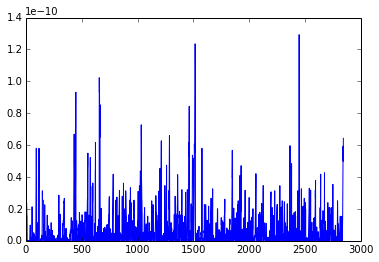

In [39]:
plt.plot(dr2)